In [1]:
!pip install yfinance
!pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 6.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp310-cp310-macosx_11_0_arm64.whl size=263119 sha256=03419fb4cf992ba1c2f28c0515dc966e29808e72f4d35621e42c1ac9714e54e4
  Stored in directory: /Users/avineetsharma/Library/Caches/pip/wheels/8d/0e/f8/48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from statsmodels.tsa.arima.model import ARIMA
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

%matplotlib inline


In [3]:
# Fetch historical data for Bitcoin and Ethereum
btc = yf.download('BTC-USD', start='2017-01-01', end='2025-01-01')
# eth = yf.download('ETH-USD', start='2015-01-01', end='2023-01-01')

# Display the first few rows of each dataset to inspect the data
print("Bitcoin data:")
print(btc.head())
# print("\nEthereum data:")
# print(eth.head())


[*********************100%***********************]  1 of 1 completed

Bitcoin data:
Price                        Adj Close        Close         High          Low  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2017-01-01 00:00:00+00:00   998.325012   998.325012  1003.080017   958.698975   
2017-01-02 00:00:00+00:00  1021.750000  1021.750000  1031.390015   996.702026   
2017-01-03 00:00:00+00:00  1043.839966  1043.839966  1044.079956  1021.599976   
2017-01-04 00:00:00+00:00  1154.729980  1154.729980  1159.420044  1044.400024   
2017-01-05 00:00:00+00:00  1013.380005  1013.380005  1191.099976   910.416992   

Price                             Open     Volume  
Ticker                         BTC-USD    BTC-USD  
Date                                               
2017-01-01 00:00:00+00:00   963.658020  147775008  
2017-01-02 00:00:00+00:00   998.617004  222184992  
2017-01-03 00:00:00+00:00  1021.599976  185168000  
2017-01-04 00:00:00+00:00

In [ ]:
btc.dropna(inplace=True)
crypto_data = btc.loc[:'2023-12-31', 'Close'].copy()
display(crypto_data.head())
display(crypto_data.tail())


,Close
Date,
2017-01-01 00:00:00+00:00,998.325012
2017-01-02 00:00:00+00:00,1021.750000
2017-01-03 00:00:00+00:00,1043.839966
2017-01-04 00:00:00+00:00,1154.729980
2017-01-05 00:00:00+00:00,1013.380005


,Close
Date,
2023-12-27 00:00:00+00:00,43442.855469
2023-12-28 00:00:00+00:00,42627.855469
2023-12-29 00:00:00+00:00,42099.402344
2023-12-30 00:00:00+00:00,42156.902344
2023-12-31 00:00:00+00:00,42265.187500


<Axes: xlabel='Date'>

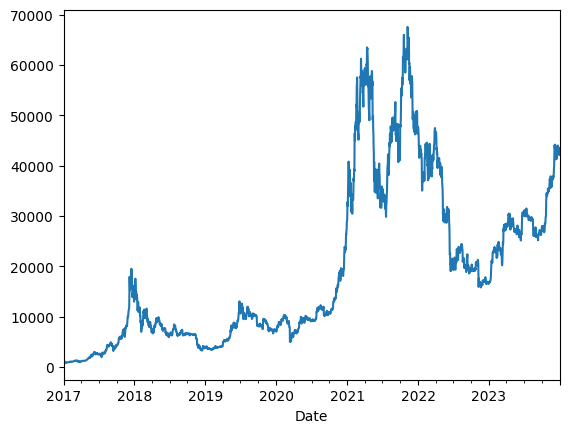

In [ ]:
crypto_data.plot()

In [ ]:
crypto_data.head()

,Close
Date,
2017-01-01 00:00:00+00:00,998.325012
2017-01-02 00:00:00+00:00,1021.750000
2017-01-03 00:00:00+00:00,1043.839966
2017-01-04 00:00:00+00:00,1154.729980
2017-01-05 00:00:00+00:00,1013.380005


In [ ]:
crypto_data = crypto_data.reset_index()
display(crypto_data.head())
display(crypto_data.tail())

,Date,Close
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


,Date,Close
2551,2023-12-27 00:00:00+00:00,43442.855469
2552,2023-12-28 00:00:00+00:00,42627.855469
2553,2023-12-29 00:00:00+00:00,42099.402344
2554,2023-12-30 00:00:00+00:00,42156.902344
2555,2023-12-31 00:00:00+00:00,42265.187500


In [ ]:
crypto_df = crypto_data.rename(columns={'Date':'ds', 'Close': 'y'})

In [ ]:
display(crypto_df.head())
display(crypto_df.tail())

,ds,y
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


,ds,y
2551,2023-12-27 00:00:00+00:00,43442.855469
2552,2023-12-28 00:00:00+00:00,42627.855469
2553,2023-12-29 00:00:00+00:00,42099.402344
2554,2023-12-30 00:00:00+00:00,42156.902344
2555,2023-12-31 00:00:00+00:00,42265.187500


In [ ]:
# Remove level 1 index
#crypto_df.columns = crypto_df.columns.droplevel(1)
display(crypto_df.head())
display(crypto_df.tail())


,ds,y
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


,ds,y
2551,2023-12-27 00:00:00+00:00,43442.855469
2552,2023-12-28 00:00:00+00:00,42627.855469
2553,2023-12-29 00:00:00+00:00,42099.402344
2554,2023-12-30 00:00:00+00:00,42156.902344
2555,2023-12-31 00:00:00+00:00,42265.187500


In [ ]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      2556 non-null   datetime64[ns, UTC]
 1   y       2556 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 40.1 KB


In [ ]:
crypto_model = Prophet()

In [ ]:
crypto_df['ds'] = crypto_df['ds'].dt.tz_localize(None)
crypto_model.fit(crypto_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29gooorg/uji5v9mn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29gooorg/kw32hpak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53199', 'data', 'file=/tmp/tmp29gooorg/uji5v9mn.json', 'init=/tmp/tmp29gooorg/kw32hpak.json', 'output', 'file=/tmp/tmp29gooorg/prophet_modelje69x_i3/prophet_model-20241108011646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_trends = crypto_model.make_future_dataframe(periods=365, freq="D")


In [ ]:
forecast_trends = crypto_model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-1916.397946,-6422.393116,4279.454944,-1916.397946,-1916.397946,671.527370,671.527370,671.527370,3.834907,3.834907,3.834907,667.692463,667.692463,667.692463,0.0,0.0,0.0,-1244.870576
1,2017-01-02,-1883.340181,-6667.856719,4430.688134,-1883.340181,-1883.340181,687.491241,687.491241,687.491241,-1.057371,-1.057371,-1.057371,688.548612,688.548612,688.548612,0.0,0.0,0.0,-1195.848940
2,2017-01-03,-1850.282416,-6440.858260,4536.065560,-1850.282416,-1850.282416,694.290188,694.290188,694.290188,-4.374297,-4.374297,-4.374297,698.664485,698.664485,698.664485,0.0,0.0,0.0,-1155.992229
3,2017-01-04,-1817.224652,-6345.901349,4379.776236,-1817.224652,-1817.224652,741.361899,741.361899,741.361899,44.195784,44.195784,44.195784,697.166115,697.166115,697.166115,0.0,0.0,0.0,-1075.862752
4,2017-01-05,-1784.166887,-6483.346350,4083.728590,-1784.166887,-1784.166887,651.336189,651.336189,651.336189,-32.072250,-32.072250,-32.072250,683.408439,683.408439,683.408439,0.0,0.0,0.0,-1132.830698


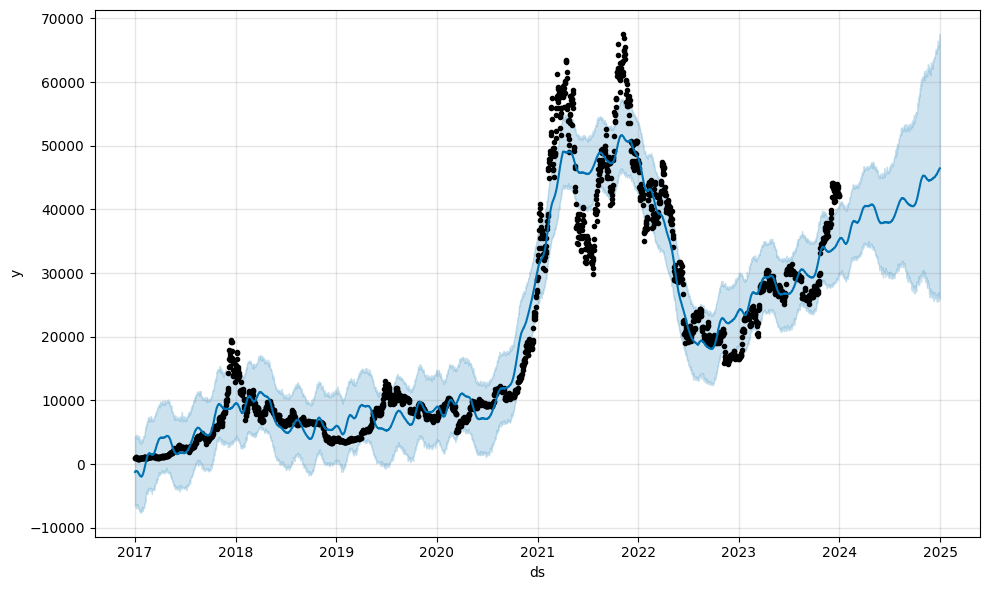

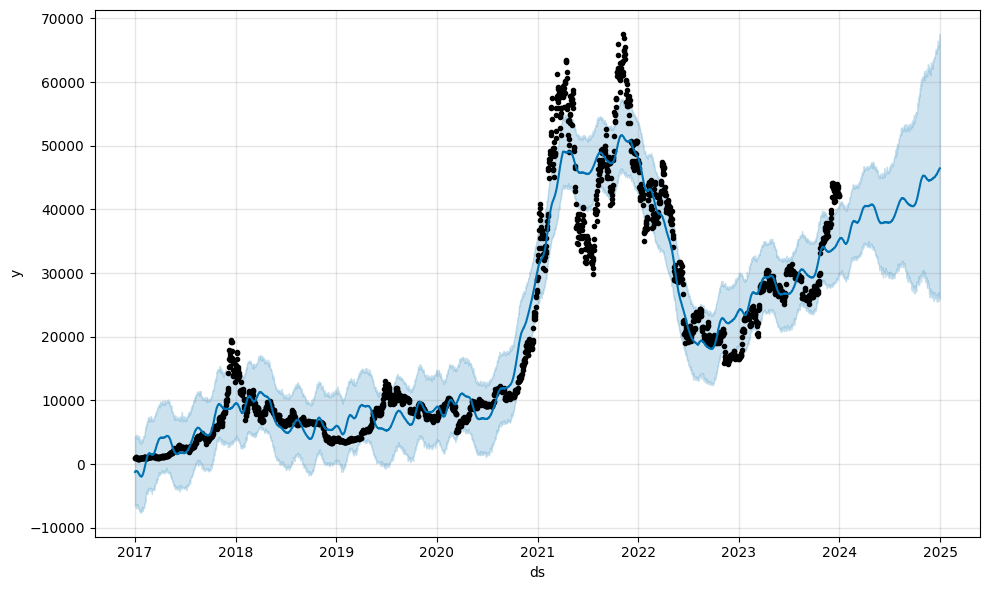

In [ ]:
crypto_model.plot(forecast_trends)

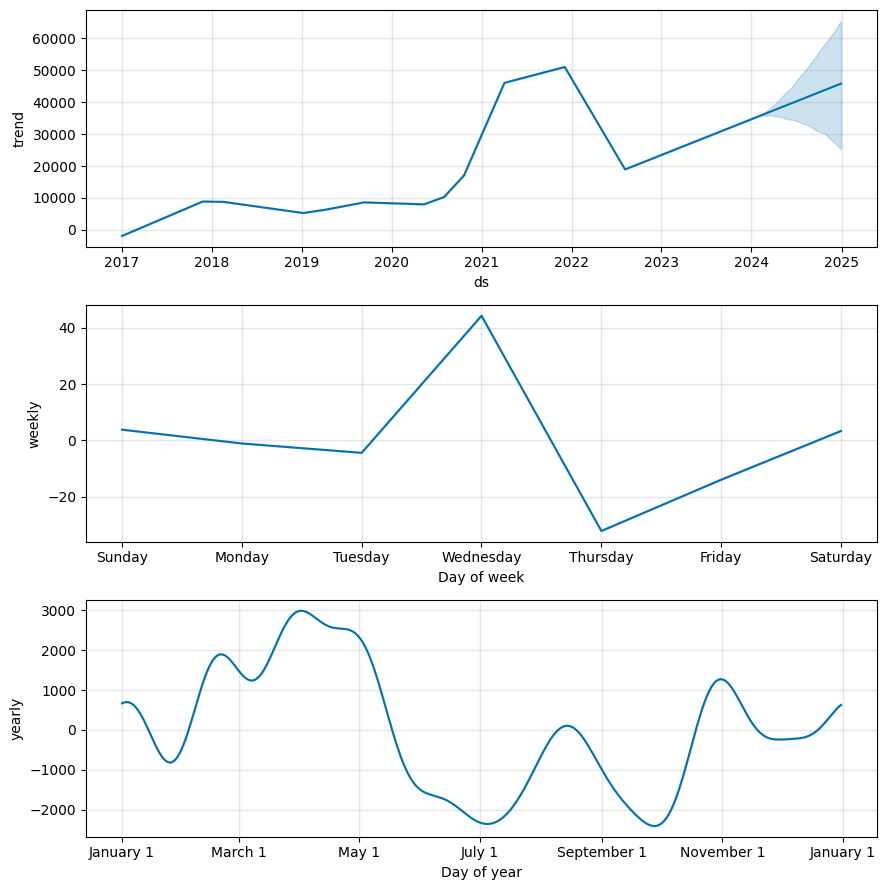

In [ ]:
figures = crypto_model.plot_components(forecast_trends)

In [ ]:
forecast_trends= forecast_trends[['ds','yhat']]

In [ ]:
#crypto_data = btc.loc[:'2023-12-31', 'Close']
forecast_trends.set_index('ds', inplace=True)


KeyError: "None of ['ds'] are in the columns"

In [81]:
forecast_trends_2024 = forecast_trends.loc['2024-01-01':].copy()   # Data from 2024-01-01 to now

df_after_2024 = btc.copy()
# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)

# df_after_2024.set_index('Date', inplace=True)
display (df_after_2024.tail())

#df_after_2024 = df_after_2024.loc['2024-01-01':].copy()   # Data from 2024-01-01 to now

# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)
# df_after_2024.set_index('Date', inplace=True)
#display (df_after_2024.head())
#display(forecast_trends_2024.head())
#display(crypto_data.head())




Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-03 00:00:00+00:00,68741.117188,68741.117188,69361.656250,67482.523438,69296.382812,34868307655
2024-11-04 00:00:00+00:00,67811.507812,67811.507812,69433.179688,66803.648438,68742.132812,41184819348
2024-11-05 00:00:00+00:00,69359.562500,69359.562500,70522.789062,67458.867188,67811.171875,46046889204
2024-11-06 00:00:00+00:00,75639.078125,75639.078125,76460.156250,69322.031250,69358.500000,118592653963
2024-11-08 00:00:00+00:00,76234.515625,76234.515625,76341.835938,75900.031250,75900.031250,63735214080


In [71]:
combined_df = forecast_trends.join(df_after_2024, how='inner', lsuffix='_forecast', rsuffix='_after_2024')
combined_df.head()

,yhat,Close
2022-07-19,19440.845236,23389.433594
2022-07-20,19430.809432,23231.732422
2022-07-21,19300.234057,23164.628906
2022-07-22,19268.168267,22714.978516
2022-07-23,19239.010541,22465.478516
